In [25]:
# from atm_data.data_utils.weather_noaa_data import *
from weather_data_processing import *
from pathlib import Path
from ast import literal_eval
import pandas as pd
import numpy as np
import functools

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
%matplotlib ipympl

from matplotlib import cm, colors
from scipy.stats import gaussian_kde as kde

from scipy.stats import pearsonr

airport = 'JFK'

In [26]:
import os
year = 2019
month = 7
start_date = "2019-07-01"
end_date = "2019-08-01" # exclusive

data_dir = Path.cwd().resolve().parent / 'data'
# weather_path = data_dir / 'noaa_lcdv2/lcd_lga_1987-2023_cleaned.parquet'
weather_path = data_dir / f'noaa_lcdv2/cleaned/lcd_{airport.lower()}_2018-2019_cleaned.parquet'
# TODO: handling in the bayesair remapped to like not have to do the "_decade" suffix
# schedule_path = data_dir / 'bts_remapped/lga_reduced_2010-2019_clean_decade/parquet/lga_reduced_2010-2019_clean_decade.parquet'
schedule_path = data_dir / f'bts_remapped/{airport}/2019/clean_daily/parquet/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_{year}_{month}_{airport}.parquet'

# start_date = "2019-07-01"
# end_date = "2019-08-01" # exclusive

# start_date = "2010-01-01"
# end_date = "2020-01-01" # exclusive



wdf = pd.read_parquet(weather_path)
sdf = pd.read_parquet(schedule_path)
sdf = (
    sdf.set_index(
        pd.DatetimeIndex(sdf['date'])
    )
    .drop(['date'], axis=1)
)


wdf = wdf.loc[(wdf.index >= start_date) & (wdf.index < end_date)]
sdf = sdf.loc[(sdf.index >= start_date) & (sdf.index < end_date)]

# mask = (sdf.scheduled_departure_time == sdf.scheduled_arrival_time)
# display(sdf.loc[mask])

for df in (wdf, sdf):
    display(df)
    display(df.dtypes)


,hourly_alitmeter_setting,hourly_dew_point_temperature,hourly_dry_bulb_temperature,hourly_precipitation,hourly_relative_humidity,hourly_visibility,hourly_wind_direction,hourly_wind_speed,hourly_wind_gust_speed,hpwt_BCFG,...,hsc_layer_1_height,hsc_layer_2_height,hsc_layer_3_height,hsc_total_coverage,hsc_total_amount,hsc_total_height,hsc_ceiling_coverage,hsc_ceiling_amount,hsc_ceiling_height,hourly_sky_conditions
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01 00:00:00+00:00,1010.8,13.3,23.9,0.0,52.0,16.093,330.0,7.2,13.4,False,...,25.91,NaN,NaN,BKN,7.0,25.91,BKN,7.0,25.91,BKN:07-25.91
2019-07-01 01:00:00+00:00,1011.5,15.0,22.8,0.0,62.0,16.093,340.0,5.7,0.0,False,...,24.38,NaN,NaN,SCT,4.0,24.38,,0.0,inf,SCT:04-24.38
2019-07-01 02:00:00+00:00,1011.5,13.9,21.7,0.0,61.0,16.093,340.0,8.8,10.8,False,...,NaN,NaN,NaN,,0.0,inf,,0.0,inf,
2019-07-01 03:00:00+00:00,1011.5,13.9,21.1,0.0,64.0,16.093,340.0,5.7,0.0,False,...,inf,NaN,NaN,CLR,0.0,inf,,0.0,inf,CLR:00-inf
2019-07-01 04:00:00+00:00,1011.9,13.9,20.6,0.0,66.0,16.093,330.0,5.7,0.0,False,...,NaN,NaN,NaN,,0.0,inf,,0.0,inf,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31 19:00:00+00:00,1016.9,20.0,23.9,0.0,79.0,16.093,300.0,6.2,0.0,False,...,12.19,18.29,NaN,SCT,4.0,18.29,,0.0,inf,SCT:04-12.19 SCT:04-18.29
2019-07-31 20:00:00+00:00,1016.3,21.7,23.3,0.0,91.0,16.093,40.0,4.1,0.0,False,...,13.72,28.96,42.67,BKN,7.0,42.67,BKN,7.0,42.67,FEW:02-13.72 SCT:04-28.96 BKN:07-42.67
2019-07-31 21:00:00+00:00,1016.9,20.6,22.8,0.0,87.0,16.093,340.0,3.6,0.0,False,...,13.72,22.86,36.58,BKN,7.0,36.58,BKN,7.0,36.58,FEW:02-13.72 SCT:04-22.86 BKN:07-36.58


hourly_alitmeter_setting         float64
hourly_dew_point_temperature     float64
hourly_dry_bulb_temperature      float64
hourly_precipitation             float64
hourly_relative_humidity         float64
hourly_visibility                float64
hourly_wind_direction            float64
hourly_wind_speed                float64
hourly_wind_gust_speed           float64
hpwt_BCFG                        boolean
hpwt_BLSN                        boolean
hpwt_BR                          boolean
hpwt_DZ                          boolean
hpwt_FG                          boolean
hpwt_FU                          boolean
hpwt_FZDZ                        boolean
hpwt_FZFG                        boolean
hpwt_FZRA                        boolean
hpwt_GS                          boolean
hpwt_HZ                          boolean
hpwt_MIFG                        boolean
hpwt_PL                          boolean
hpwt_RA                          boolean
hpwt_SN                          boolean
hpwt_SQ         

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,cancelled,cancellation_code,diverted,diverted_reached_destination,diverted_airport_landings
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,2019,3,7,1,1,2019-07-01,AS,19930,AS,N474AS,...,0.000000,0.000000,0.0,0.0,0.000000,False,Z,False,NaN,0
2019-07-01,2019,3,7,1,1,2019-07-01,AA,19805,AA,N908NN,...,0.000000,0.000000,0.0,0.0,0.000000,False,Z,False,NaN,0
2019-07-01,2019,3,7,1,1,2019-07-01,B6,20409,B6,N590JB,...,0.000000,0.000000,0.3,0.0,0.000000,False,Z,False,NaN,0
2019-07-01,2019,3,7,1,1,2019-07-01,AA,19805,AA,N982VJ,...,0.000000,0.000000,0.0,0.0,0.000000,False,Z,False,NaN,0
2019-07-01,2019,3,7,1,1,2019-07-01,AS,19930,AS,N273AK,...,0.000000,0.000000,0.0,0.0,0.000000,False,Z,False,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,2019,3,7,31,3,2019-07-31,B6,20409,B6,N590JB,...,0.000000,0.000000,0.0,0.0,0.000000,False,Z,False,NaN,0
2019-07-31,2019,3,7,31,3,2019-07-31,B6,20409,B6,N986JB,...,0.133333,2.116667,0.0,0.0,0.000000,False,Z,False,NaN,0
2019-07-31,2019,3,7,31,3,2019-07-31,B6,20409,B6,N961JT,...,0.016667,0.000000,0.0,0.0,0.683333,False,Z,False,NaN,0


Year                               int16
Quarter                            int16
Month                              int16
DayofMonth                         int16
DayOfWeek                          int16
                                  ...   
cancelled                           bool
cancellation_code               category
diverted                            bool
diverted_reached_destination     float64
diverted_airport_landings          int16
Length: 132, dtype: object

In [ ]:
# TODO: some stats
# mask = (sdf.origin_airport == 'LGA')
# mask = (sdf.destination_airport == 'LGA')
# mask = (sdf.scheduled_departure_time == sdf.scheduled_arrival_time)
# display(sdf.loc[mask, ["scheduled_departure_time", "scheduled_arrival_time"]])
# display(sdf.loc[mask])
# uhh ok i guess it wasn't an sisue

sdf['scheduled_event_time'] = sdf.scheduled_departure_time.copy()
mask = sdf.destination_airport == airport
sdf.loc[mask, "scheduled_event_time"] = sdf.loc[mask, "scheduled_arrival_time"]

sdf['actual_event_time'] = sdf.actual_departure_time.copy()
mask = sdf.destination_airport == airport
sdf.loc[mask, "actual_event_time"] = sdf.loc[mask, "actual_arrival_time"]

sdf['scheduled_event_datetime'] = sdf.index + pd.to_timedelta(sdf.scheduled_event_time, unit='H')
sdf['actual_event_datetime'] = sdf.index + pd.to_timedelta(sdf.actual_event_time, unit='H')

sdf['event_delay'] = sdf.actual_event_time - sdf.scheduled_event_time
sdf.loc[sdf.cancelled | sdf.diverted, 'event_delay'] = 0.0

sdf['event_delay_relu'] = sdf.event_delay.clip(lower=0.0)
sdf['arrival_delay_relu'] = sdf.arrival_delay.clip(lower=0.0)
sdf['departure_delay_relu'] = sdf.departure_delay.clip(lower=0.0)

display(sdf)

C:\Users\micah\AppData\Local\Temp\ipykernel_49556\3873190144.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  sdf['scheduled_event_datetime'] = sdf.index + pd.to_timedelta(sdf.scheduled_event_time, unit='H')
C:\Users\micah\AppData\Local\Temp\ipykernel_49556\3873190144.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  sdf['actual_event_datetime'] = sdf.index + pd.to_timedelta(sdf.actual_event_time, unit='H')


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,diverted_reached_destination,diverted_airport_landings,scheduled_event_time,actual_event_time,scheduled_event_datetime,actual_event_datetime,event_delay,event_delay_relu,arrival_delay_relu,departure_delay_relu
date,,,,,,,,,,,,,,,,,,,,,
2019-07-01,2019,3,7,1,1,2019-07-01,AS,19930,AS,N474AS,...,NaN,0,5.750000,29.583333,2019-07-01 05:45:00.000000000,2019-07-02 05:34:59.999999998,23.833333,23.833333,23.833333,23.883333
2019-07-01,2019,3,7,1,1,2019-07-01,AA,19805,AA,N908NN,...,NaN,0,5.316667,4.950000,2019-07-01 05:19:00.000000001,2019-07-01 04:57:00.000000000,-0.366667,0.000000,0.000000,0.000000
2019-07-01,2019,3,7,1,1,2019-07-01,B6,20409,B6,N590JB,...,NaN,0,5.783333,6.083333,2019-07-01 05:46:59.999999998,2019-07-01 06:04:59.999999998,0.300000,0.300000,0.300000,0.000000
2019-07-01,2019,3,7,1,1,2019-07-01,AA,19805,AA,N982VJ,...,NaN,0,5.733333,5.850000,2019-07-01 05:43:59.999999998,2019-07-01 05:51:00.000000000,0.116667,0.116667,0.116667,0.000000
2019-07-01,2019,3,7,1,1,2019-07-01,AS,19930,AS,N273AK,...,NaN,0,5.750000,5.550000,2019-07-01 05:45:00.000000000,2019-07-01 05:33:00.000000000,-0.200000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,2019,3,7,31,3,2019-07-31,B6,20409,B6,N590JB,...,NaN,0,29.050000,28.783333,2019-08-01 05:03:00.000000000,2019-08-01 04:46:59.999999998,-0.266667,0.000000,0.000000,0.000000
2019-07-31,2019,3,7,31,3,2019-07-31,B6,20409,B6,N986JB,...,NaN,0,29.183333,31.433333,2019-08-01 05:10:59.999999998,2019-08-01 07:25:59.999999998,2.250000,2.250000,2.250000,2.533333
2019-07-31,2019,3,7,31,3,2019-07-31,B6,20409,B6,N961JT,...,NaN,0,29.450000,30.150000,2019-08-01 05:27:00.000000000,2019-08-01 06:09:00.000000000,0.700000,0.700000,0.700000,1.066667


In [28]:
def plot_condition_and_delays(
    type, 
    # these should be aligned time-wise
    conditions,
    dep_delays,
    arr_delays,
    start,
    end,
    condition_aggregation,
    delay_aggregation,
    colors = ('blue', 'red', 'orange'),
    figsize = (8,8)
):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax2 = ax.twinx()

    ax.plot(conditions, color=colors[0], label=f'{type}')
    ax2.plot(dep_delays, color=colors[1], label='departure delay')
    ax2.plot(arr_delays, color=colors[2], label='arrival delay')

    add_decorations(fig, ax, ax2, type, condition_aggregation, delay_aggregation, start, end, 'horizontal')

    return fig


def scatter_condition_and_delays(
    type, 
    # these should be aligned time-wise
    conditions,
    dep_delays,
    arr_delays,
    start,
    end,
    condition_aggregation,
    delay_aggregation,
    colors = ('blue', 'red', 'orange'),
    figsize = (8,8)
):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    def plot_scatter_and_trend(ax, x, y, color, linestyle='-', marker='.', label=None, d=1):        
        ax.scatter(x, y, color=c, marker=marker, label=label)
        z = np.polyfit(x, y, deg=d)
        p = np.poly1d(z)
        plt.plot(x, p(x), color=color, linestyle=linestyle)

    x = conditions
    for y, c, l in ((dep_delays, colors[1], 'departure'), (arr_delays, colors[2], 'arrival')):
        r, _ = pearsonr(x, y)
        plot_scatter_and_trend(ax, x.to_numpy(), y.to_numpy(), c, label=f'{l}, ρ={r:.03f}')

    add_decorations(fig, ax, None, type, condition_aggregation, delay_aggregation, start, end, 'vertical')

    return fig


def add_decorations(
    fig, ax, ax2, type, condition_aggregation, delay_aggregation, start, end, side
):
    if side == 'horizontal':
        set_condition_label = ax.set_ylabel
        set_delay_label = ax2.set_ylabel
        ax.set_ylim(bottom=0)
        add_flight_rule_regions(ax, type, 'horizontal')
        ax.set_xlabel('date')
        fig.legend()
    elif side == 'vertical':
        set_condition_label = ax.set_xlabel
        set_delay_label = ax.set_ylabel
        ax.set_xlim(left=0)
        add_flight_rule_regions(ax, type, 'vertical')
        ax.legend()
    else:
        raise ValueError

    set_condition_label(
        f"{type} {'(ft)' if type == 'ceiling' else '(mi)'} -- lower is worse -- [{condition_aggregation}]"
    )
    set_delay_label(f'delay (hrs) -- higher is worse -- [{delay_aggregation}]')

    ax.set_title(
        f'{type} and delays between {start} and {end}'
    )


def add_flight_rule_regions(
    ax, 
    type,
    side, 
    thresholds=None,
    colors=None,
    alpha=.2,
    linestyle='--',
):
    if side == 'horizontal':
        add_line = ax.axhline
        add_span = ax.axhspan
        cmin, cmax = ax.get_ylim()            
    elif side == 'vertical':
        add_line = ax.axvline
        add_span = ax.axvspan
        cmin, cmax = ax.get_xlim()
    else:
        raise ValueError('type must be horizontal or vertical :(')

    if thresholds is None:
        if type == 'ceiling':
            thresholds = [500, 1000, 3200]
        elif type == 'visibility':
            thresholds = [1, 3, 4]
        else:
            raise ValueError('type must be ceiling or visibility')
    else:
        assert len(thresholds) == 3 # TODO: generalize??
        
    if colors is None:
        colors = ['darkred', 'red', 'yellow', 'lightgreen']
    else:
        assert len(colors) == 4 # TODO: generalize??

    for threshold, color in zip(thresholds, colors):
        add_line(threshold, color=color, linestyle=linestyle)
    
    span_lo = [cmin] + thresholds
    span_hi = thresholds + [cmax]

    labels = [
        'LIFR (low IFR)',
        'IFR (instrument)',
        'MVFR (marginal)',
        'VFR (visual)',
    ]
    
    for lo, hi, color, label in zip(span_lo, span_hi, colors, labels):
        add_span(lo, hi, facecolor=color, alpha=alpha, label=label)



In [29]:
# TODO: maybe we can auto-generate a description??
def process_series(
    s,
    *argv,
):
    # print(argv)
    for arg in argv:
        # print(arg, type(arg))
        if isinstance(arg, str):
            action = arg
            if action == 'no_inf':
                s = s.loc[~s.isin([np.inf])]
            elif action == 'no_nan':
                s = s.loc[~s.isin([np.nan])]
            elif action == 'inverse':
                s = 1.0 / s
        elif isinstance(arg, (list, tuple, np.ndarray)):
            action = arg[0]
            if action == 'scale':
                s = s * arg[1]
            elif action == 'clip':
                s = s.clip(lower=arg[1], upper=arg[2])
            elif action == 'filter_index':
                s = s.loc[(arg[1] <= s.index) & (s.index < arg[2])]
            elif action == 'apply_func':
                s = s.apply(arg[1])
            elif action == 'apply_func_vec':
                s = arg[1](s)
            else:
                sg = s.groupby(pd.Grouper(freq=arg[1]))
                if action == 'mean':
                    s = sg.mean()
                elif action == 'min':
                    s = sg.min()
                elif action == 'max':
                    s = sg.max()
                elif action == 'size':
                    s = sg.size()
                else:
                    raise ValueError(f'invalid step: {arg}')
    return s

freq = '1D'
ceiling = wdf.hsc_ceiling_height

process_ceiling = functools.partial(process_series, ceiling)

ch_daily_finite_mean = process_ceiling(
    'no_inf', 'no_nan', ('mean', freq)
)

ch_daily_min = process_ceiling(
    'min'
)

ch_daily_inverse_mean = process_ceiling(
    'inverse', ('mean', freq)
)
ch_daily_harmonic_mean = process_series(
    ch_daily_inverse_mean, 'inverse'
)

ch_hourly_clipped = process_ceiling(
    ('clip', .5, 64)
)

ch_daily_clipped_mean = process_series(
    ch_hourly_clipped, ('mean', freq)
)

ch_daily_clipped_inverse_mean = process_series(
    ch_hourly_clipped, ('inverse'), ('mean', freq)  
)

ch_daily_clipped_harmonic_mean = process_series(
    ch_daily_clipped_inverse_mean, ('inverse')
)

# display(ch_daily_clipped_harmonic_mean.nsmallest(5))

sdf_outgoing = sdf.loc[sdf.origin_airport == airport]
sdf_incoming = sdf.loc[sdf.destination_airport == airport]

dep_delay_daily = process_series(
    sdf_outgoing.departure_delay_relu, ('mean', freq)
)
arr_delay_daily = process_series(
    sdf_incoming.arrival_delay_relu, ('mean', freq)
)


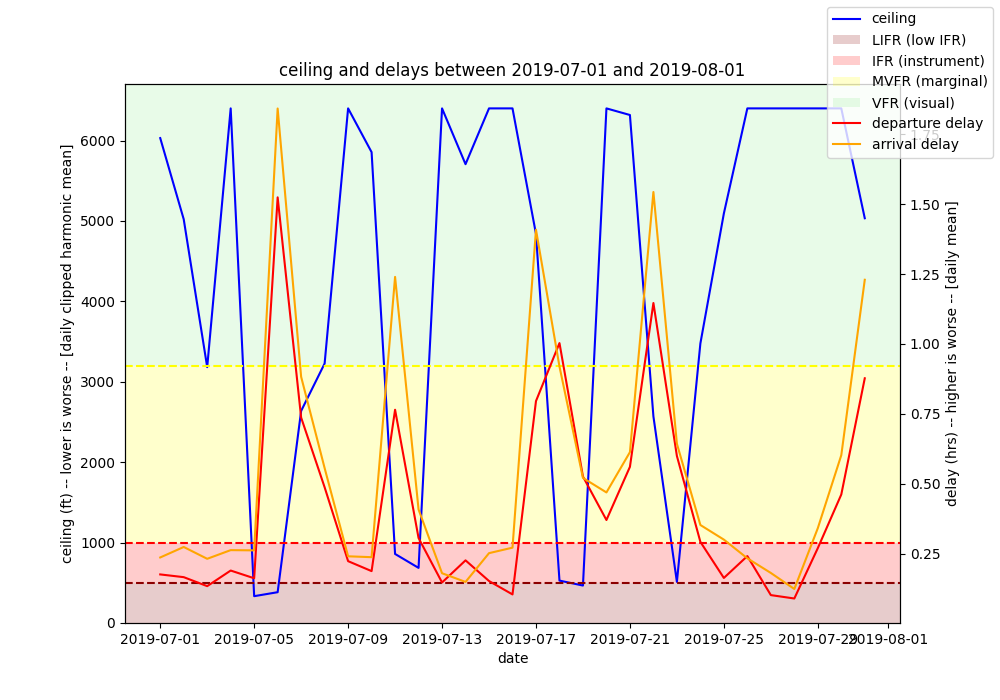

In [30]:
# show that we can do these from scratch easily!
# though maybe kinda silly and not much benefit over pandas methods
freq = '1D'
start = '2019-07-01'
end = '2019-08-01'

processed_ceiling = process_series(
    wdf.hsc_ceiling_height,
    ('filter_index', start, end),
    ('clip', .5, 64), 
    ('scale', 100), 
    ('inverse'), 
    ('mean', freq), 
    ('inverse'),
)
v = processed_ceiling

d = process_series(
    sdf_outgoing.departure_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

a = process_series(
    sdf_incoming.arrival_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

fig = plot_condition_and_delays(
    type='ceiling', 
    conditions=v,
    dep_delays=d,
    arr_delays=a,
    start=start,
    end=end,
    condition_aggregation='daily clipped harmonic mean',
    delay_aggregation='daily mean',
    figsize=(10,7)
)

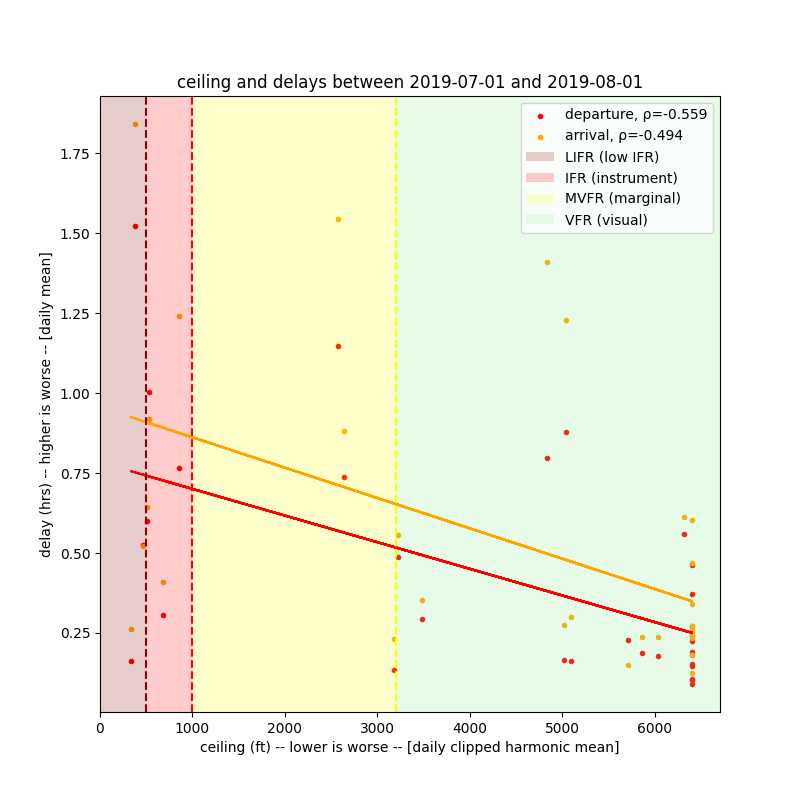

In [31]:
fig = scatter_condition_and_delays(
    type='ceiling', 
    conditions=v,
    dep_delays=d,
    arr_delays=a,
    start=start,
    end=end,
    condition_aggregation='daily clipped harmonic mean',
    delay_aggregation='daily mean',
    figsize=(8,8)
)

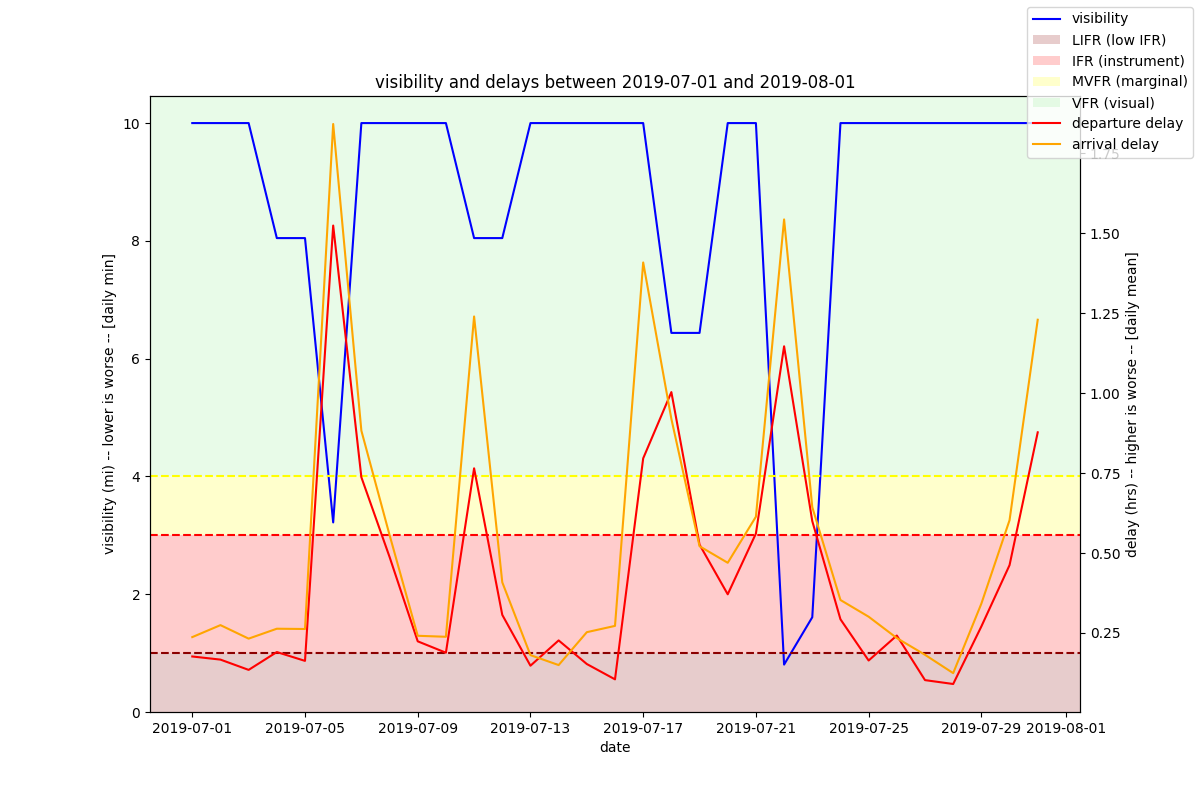

In [32]:
processed_visibility = process_series(
    wdf.hourly_visibility,
    ('filter_index', start, end),
    ('clip', .001, 10), 
    # ('inverse'), 
    # ('mean', freq), 
    # ('inverse'),
    ('min', freq)
)

v = processed_visibility

fig = plot_condition_and_delays(
    type='visibility', 
    conditions=v,
    dep_delays=d,
    arr_delays=a,
    start=start,
    end=end,
    condition_aggregation='daily min',
    delay_aggregation='daily mean',
    figsize=(12,8)
)

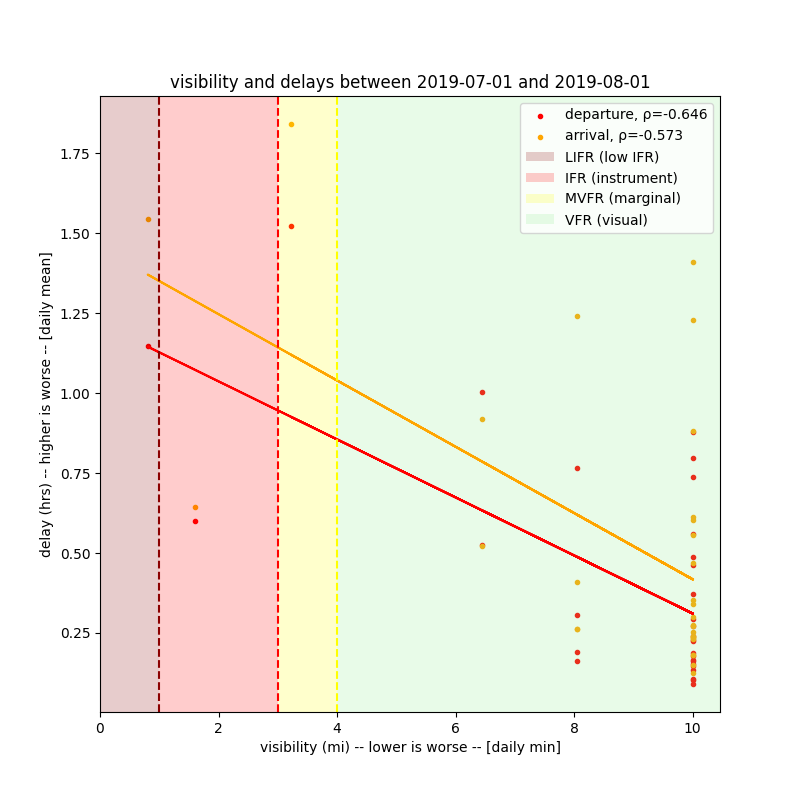

In [33]:
fig = scatter_condition_and_delays(
    type='visibility', 
    conditions=v,
    dep_delays=d,
    arr_delays=a,
    start=start,
    end=end,
    condition_aggregation='daily min',
    delay_aggregation='daily mean',
    figsize=(8,8)
)

[[8.63417386e+03 5.99013956e+03 3.24117007e+03 9.74632275e+03
  3.33842624e+02 3.85352875e+02 2.81091294e+03 3.38648896e+03
  9.38905432e+03 7.13674107e+03 8.71346776e+02 6.95929757e+02
  1.00000000e+04 7.54500909e+03 8.45883441e+03 8.36673072e+03
  5.44186895e+03 5.27417470e+02 4.70483196e+02 9.05705230e+03
  9.12555000e+03 2.69725233e+03 5.11291190e+02 3.78870727e+03
  6.69089472e+03 1.00000000e+04 1.00000000e+04 9.87153190e+03
  9.50519751e+03 9.87153190e+03 6.17506832e+03]
 [1.00000000e+01 1.00000000e+01 1.00000000e+01 8.04700000e+00
  8.04700000e+00 3.21900000e+00 1.00000000e+01 1.00000000e+01
  1.00000000e+01 1.00000000e+01 8.04700000e+00 8.04700000e+00
  1.00000000e+01 1.00000000e+01 1.00000000e+01 1.00000000e+01
  1.00000000e+01 6.43700000e+00 6.43700000e+00 1.00000000e+01
  1.00000000e+01 8.05000000e-01 1.60900000e+00 1.00000000e+01
  1.00000000e+01 1.00000000e+01 1.00000000e+01 1.00000000e+01
  1.00000000e+01 1.00000000e+01 1.00000000e+01]]


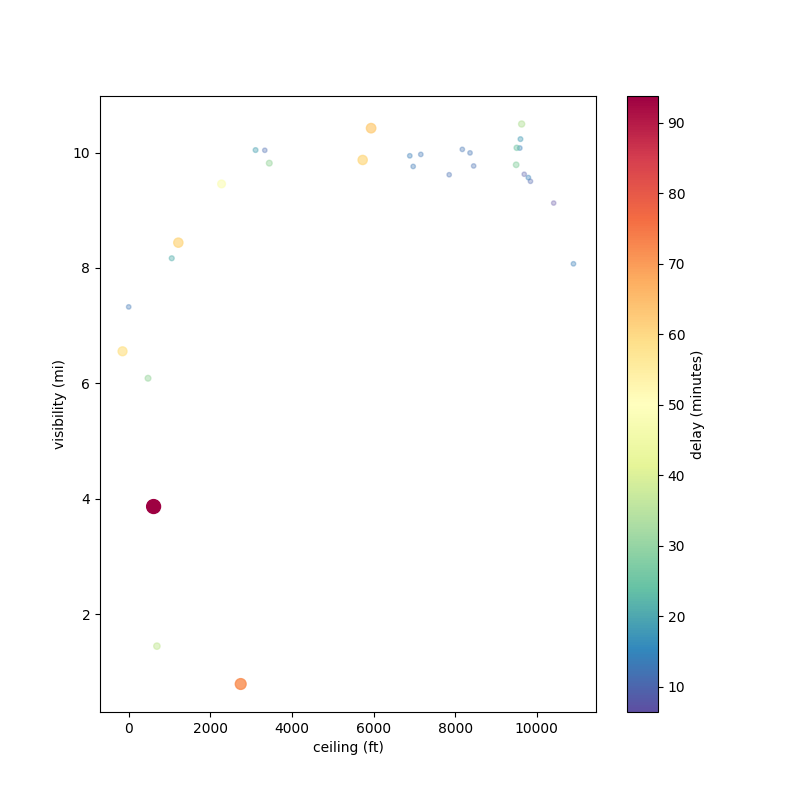

In [34]:
freq = '1D'
# start = '2018-01-01'
# end = '2020-01-01'

start = start_date
end = end_date


processed_ceiling = process_series(
    wdf.hsc_ceiling_height,
    ('filter_index', start, end),
    ('clip', .1, 100), 
    ('scale', 100), 
    ('inverse'), 
    ('mean', freq), 
    ('inverse'),
)

processed_visibility = process_series(
    wdf.hourly_visibility,
    ('filter_index', start, end),
    ('clip', .001, 10), 
    # ('inverse'), 
    # ('mean', freq), 
    # ('inverse'),
    ('min', freq)
)

d = process_series(
    sdf_outgoing.departure_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

a = process_series(
    sdf_incoming.arrival_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

processed_delay = process_series(
    sdf.event_delay_relu,
    ('filter_index', start, end),
    ('mean', freq),
)

samples = np.array([processed_ceiling, processed_visibility])

print(samples)

def scatter_test(processed_ceiling, processed_visibility, a, k=.04):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    a = a.to_numpy()

    # define color map
    cmap = plt.colormaps["Spectral_r"]
    # c = kde(samples).evaluate(samples)
    c = a * 60 #* kde(samples).evaluate(samples)

    norm = colors.Normalize(min(c), max(c))

    def rand_jitter(arr, k=.01):
        stdev = (.01 if k is None else k) * (max(arr) - min(arr))
        return arr + np.random.randn(len(arr)) * stdev

    def jitter(ax, x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, k=None, **kwargs):
        return ax.scatter(rand_jitter(x, k), rand_jitter(y, k), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)

    cn = ((c-min(c))/(max(c)-min(c)))
    cns = 90*(cn**2)+10
    cna = .7*cn+.3
    jitter(ax, processed_ceiling, processed_visibility, c=c, cmap=cmap, alpha=cna, s=cns, k=k)

    # ax.set_xlim(-80, 4000)
    # ax.set_ylim(-.1, 5)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    cbar.set_label('delay (minutes)')

    ax.set_xlabel('ceiling (ft)')
    ax.set_ylabel('visibility (mi)')

    return fig

fig = scatter_test(processed_ceiling, processed_visibility, processed_delay)

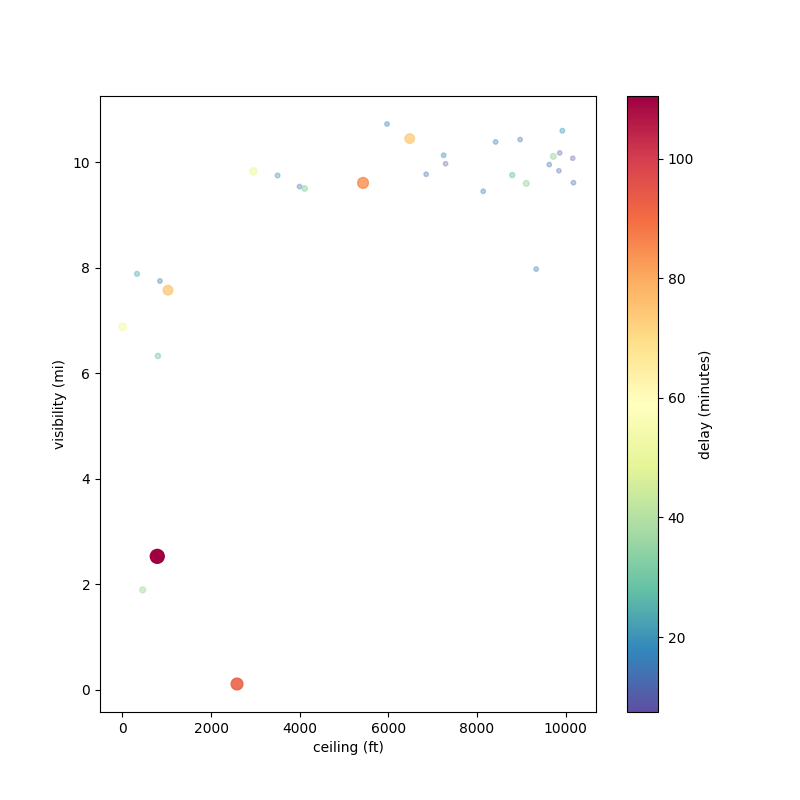

In [35]:
fig = scatter_test(processed_ceiling, processed_visibility, a)

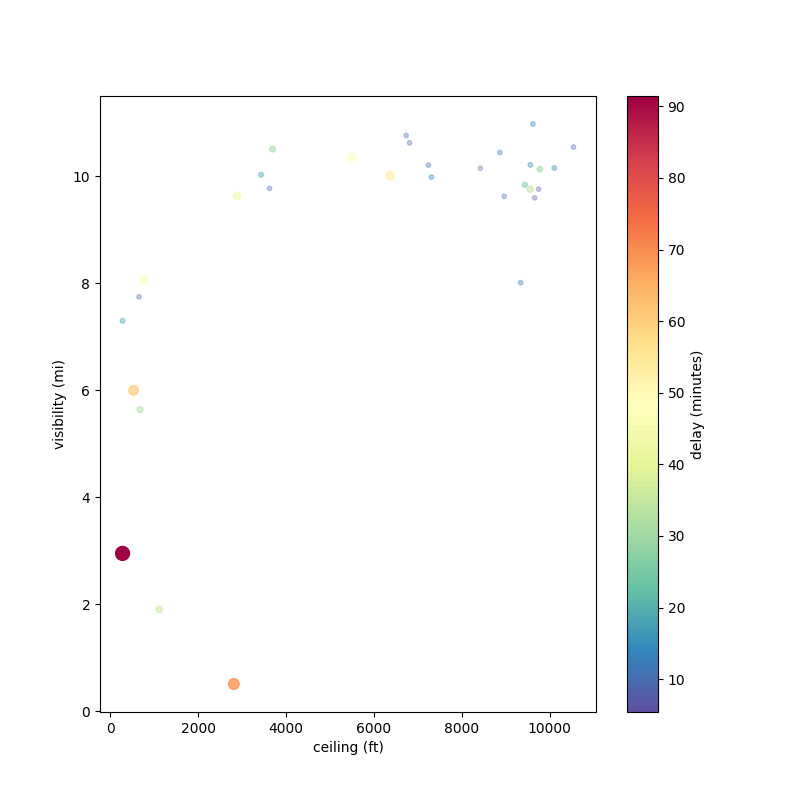

In [36]:
fig = scatter_test(processed_ceiling, processed_visibility, d)

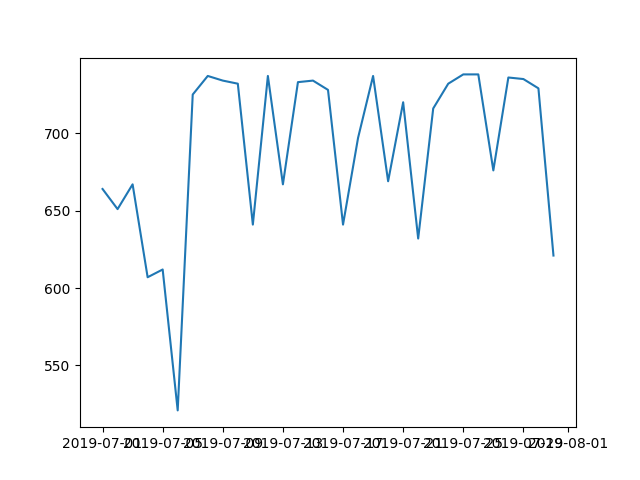

In [37]:
freq = '1D'
start = '2010-01-01'
end = '2020-01-01'

flight_counts = process_series(
    sdf.flight_number,
    ('size', freq)
)

plt.figure()
plt.plot(flight_counts)

C:\Users\micah\AppData\Local\Temp\ipykernel_49556\255982469.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Text(0.5, 1.0, 'daily flight counts')

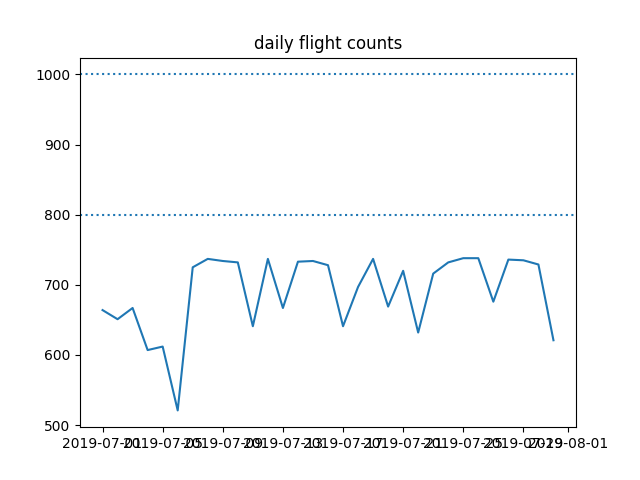

In [38]:
freq = '1D'
start = '2018-01-01'
end = '2020-01-01'

flight_counts = process_series(
    sdf.flight_number,
    ('size', freq),
    ('filter_index', start, end)
)

cutoffs = [0, 800, 1000, 9999]

flight_counts_list = []
names = []
cutoff_lines = []

for i in range(1, len(cutoffs)):
    lo = cutoffs[i-1]
    hi = cutoffs[i]
    fc = flight_counts.loc[
        (flight_counts > lo) & (flight_counts <= hi)
    ]
    flight_counts_list.append(fc)
    names.append(f'days with daily flight count in [{lo}, {hi}), total: {len(fc)}')
    # cutoff_lines.append(hi)
cutoff_lines = cutoffs[1:-1]

zlist = list(zip(flight_counts_list, names))

plt.figure()
for fc, name in zlist:
    plt.plot(fc)
for cl in cutoff_lines:
    plt.axhline(cl, linestyle=':')
plt.title('daily flight counts')
# plt.legend()

Text(0.5, 1.0, 'daily flight counts')

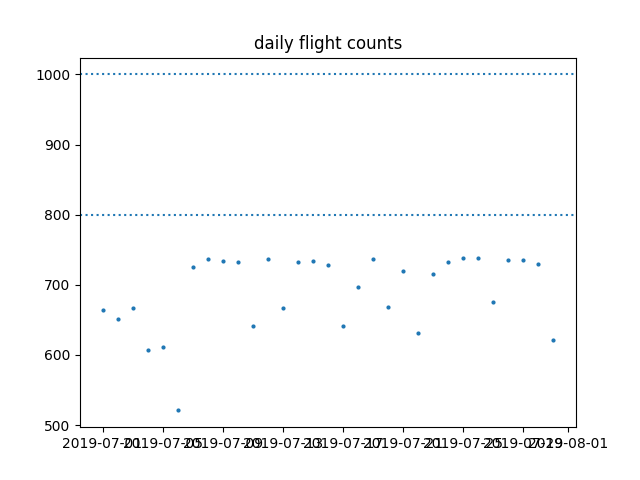

In [39]:
plt.figure()
# print(len(list(zlist)))
for fc, name in zlist:
    # print("hi")
    # print(fc.index, fc, name)
    plt.scatter(fc.index, fc, s=4)
for cl in cutoff_lines:
    plt.axhline(cl, linestyle=':')
plt.title('daily flight counts')
# plt.legend()

In [76]:
def split_scatter_test(lst, zl_idx):
    idx = lst[zl_idx].index
    fig = scatter_test(
        processed_ceiling[idx.tz_localize('UTC')], 
        processed_visibility[idx.tz_localize('UTC')], 
        processed_delay[idx]
    )
    fig.suptitle(names[zl_idx])
    return fig

In [75]:
tmp = flight_counts_list[0].index.tz_localize('UTC')
print(tmp == processed_ceiling.index)
print(tmp == processed_visibility.index)
print(tmp == processed_delay.index.tz_localize('UTC'))

processed_delay.index.tz_localize('UTC')

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


DatetimeIndex(['2019-07-01 00:00:00+00:00', '2019-07-02 00:00:00+00:00',
               '2019-07-03 00:00:00+00:00', '2019-07-04 00:00:00+00:00',
               '2019-07-05 00:00:00+00:00', '2019-07-06 00:00:00+00:00',
               '2019-07-07 00:00:00+00:00', '2019-07-08 00:00:00+00:00',
               '2019-07-09 00:00:00+00:00', '2019-07-10 00:00:00+00:00',
               '2019-07-11 00:00:00+00:00', '2019-07-12 00:00:00+00:00',
               '2019-07-13 00:00:00+00:00', '2019-07-14 00:00:00+00:00',
               '2019-07-15 00:00:00+00:00', '2019-07-16 00:00:00+00:00',
               '2019-07-17 00:00:00+00:00', '2019-07-18 00:00:00+00:00',
               '2019-07-19 00:00:00+00:00', '2019-07-20 00:00:00+00:00',
               '2019-07-21 00:00:00+00:00', '2019-07-22 00:00:00+00:00',
               '2019-07-23 00:00:00+00:00', '2019-07-24 00:00:00+00:00',
               '2019-07-25 00:00:00+00:00', '2019-07-26 00:00:00+00:00',
               '2019-07-27 00:00:00+00:00', '2019-0

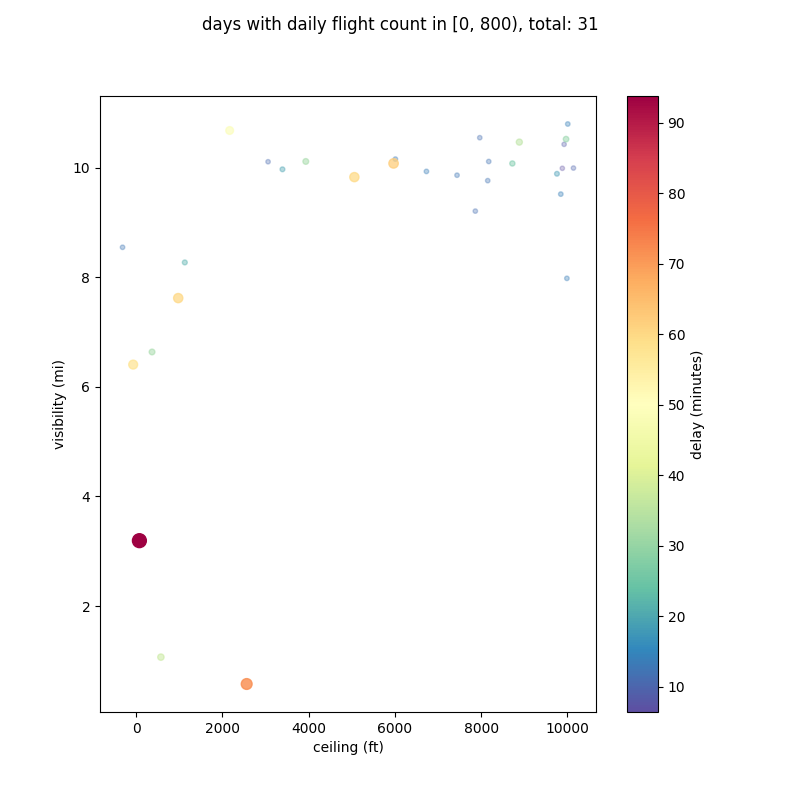

In [77]:
fig = split_scatter_test(flight_counts_list, 0)

ValueError: min() arg is an empty sequence

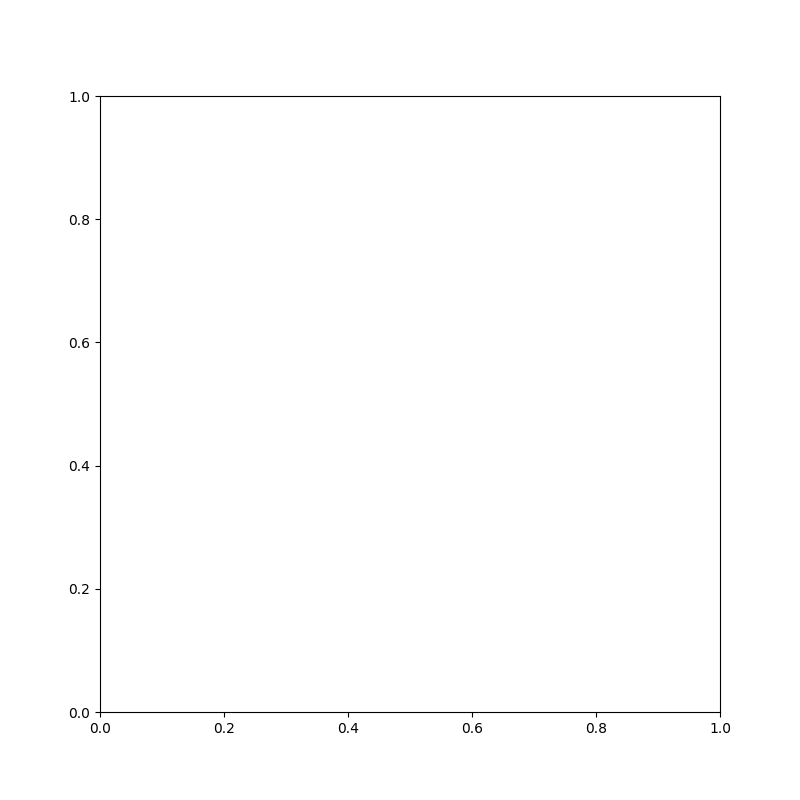

In [78]:
fig = split_scatter_test(flight_counts_list, 1)

ValueError: min() arg is an empty sequence

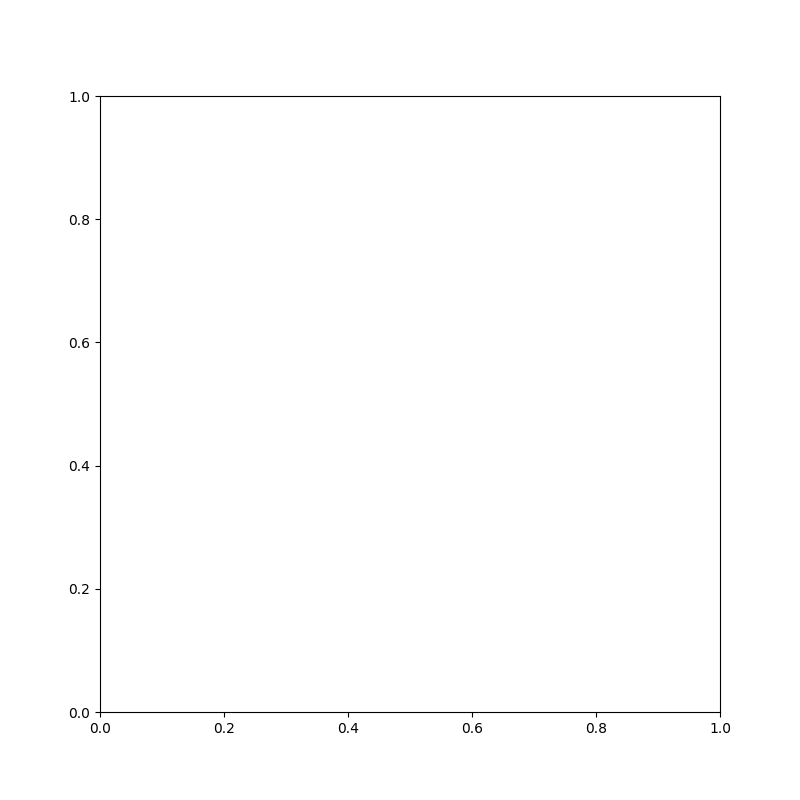

In [79]:
fig = split_scatter_test(flight_counts_list, 2)

C:\Users\micah\AppData\Local\Temp\ipykernel_49556\3227724610.py:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  sg = s.groupby(pd.Grouper(freq=arg[1]))


Text(0.5, 1.0, 'daily peak (avg over 1H blocks) scheduled capacity')

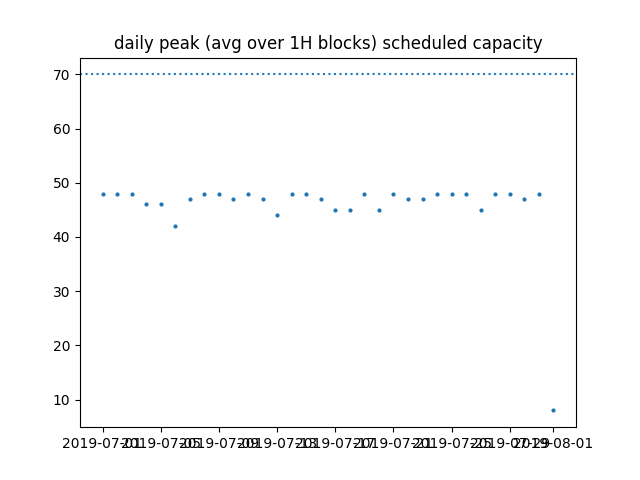

In [80]:
freq = '1D'
# start = '2018-01-01'
# end = '2020-01-01'

tmp = sdf.scheduled_event_datetime.copy()
tmp.index = pd.DatetimeIndex(sdf.scheduled_event_datetime)
# print(tmp)

l = 1
capacity_counts = process_series(
    tmp,
    ('filter_index', start, end),
    ('size', f'{l}H'),
    ('scale', 1/l),
    ('max', freq),
)

cutoffs = [0, 70, 999]

capacity_counts_list = []
names = []
cutoff_lines = []

for i in range(1, len(cutoffs)):
    lo = cutoffs[i-1]
    hi = cutoffs[i]
    fc = capacity_counts.loc[
        (capacity_counts > lo) & (capacity_counts <= hi)
    ]
    capacity_counts_list.append(fc)
    names.append(f'days with peak (avg over {l}H blocks) scheduled capacity in [{lo}, {hi}), total: {len(fc)}')
    # cutoff_lines.append(hi)
cutoff_lines = cutoffs[1:-1]

zlist = list(zip(capacity_counts_list, names))

plt.figure()
# print(len(list(zlist)))
for fc, name in zlist:
    # print("hi")
    # print(fc.index, fc, name)
    plt.scatter(fc.index, fc, s=4)
for cl in cutoff_lines:
    plt.axhline(cl, linestyle=':')
plt.title(f'daily peak (avg over {l}H blocks) scheduled capacity')
# plt.legend()

In [81]:
fig = split_scatter_test(capacity_counts_list, 0)

KeyError: "[Timestamp('2019-08-01 00:00:00+0000', tz='UTC')] not in index"

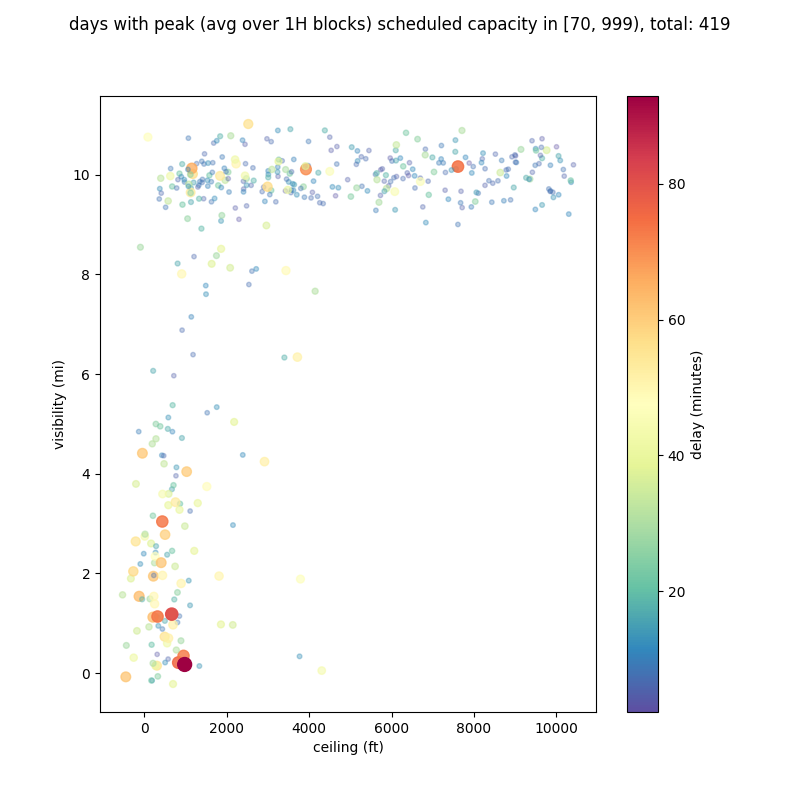

In [ ]:
fig = split_scatter_test(capacity_counts_list, 1)

In [ ]:
def scatter_test_3d(processed_ceiling, processed_visibility, z, z_label, a, k=.04):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(projection='3d')

    a = a.to_numpy()

    c = a * 60 #* kde(samples).evaluate(samples)
    cmap = plt.colormaps["Spectral_r"]

    norm = colors.Normalize(min(c), max(c))

    def rand_jitter(arr, k=.01):
        stdev = (.01 if k is None else k) * (max(arr) - min(arr))
        return arr + np.random.randn(len(arr)) * stdev

    def jitter(ax, x, y, z, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, k=None, **kwargs):
        return ax.scatter(rand_jitter(x, k), rand_jitter(y, k), rand_jitter(z, k), s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)

    cn = ((c-min(c))/(max(c)-min(c)))
    cns = 190*(cn**2)+10
    cna = .6*cn+.4
    jitter(ax, processed_ceiling, processed_visibility, z, c=c, cmap=cmap, alpha=cna, s=cns, k=k)

    # ax.set_xlim(-80, 4000)
    # ax.set_ylim(-.1, 5)
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    cbar.set_label('delay (minutes)')

    ax.set_xlabel('ceiling (ft)')
    ax.set_ylabel('visibility (mi)')
    ax.set_zlabel(z_label)

    # for angle in range(0, 360):
    #     ax.view_init(30, 40)
    ax.view_init()

    return fig


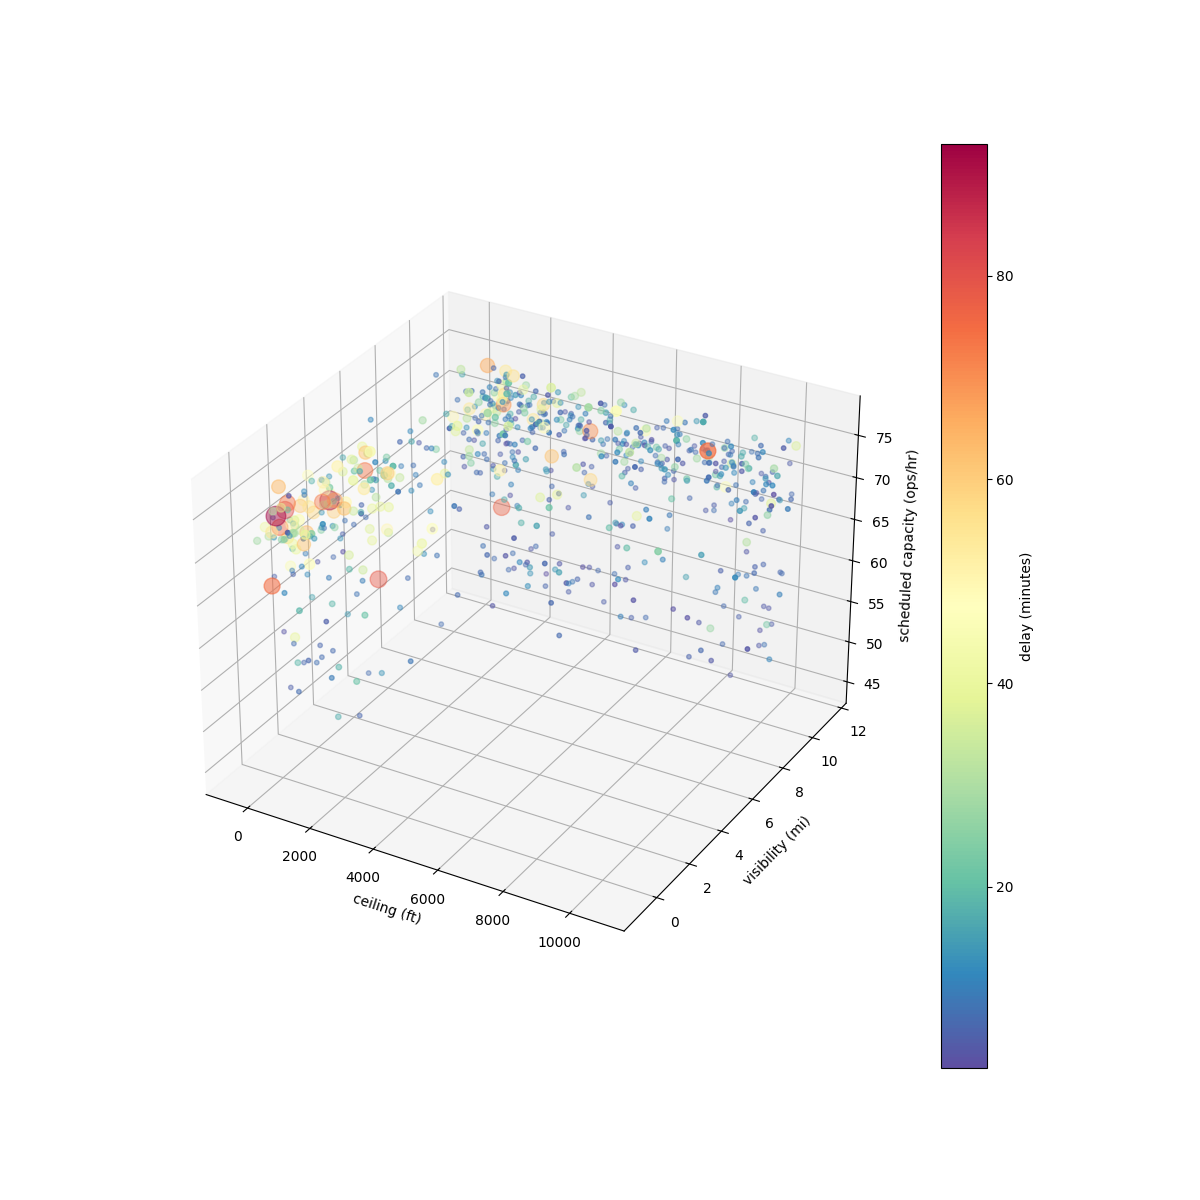

In [ ]:
idx = capacity_counts.index
fig = scatter_test_3d(
    processed_ceiling[idx], 
    processed_visibility[idx], 
    capacity_counts, 
    'scheduled capacity (ops/hr)', 
    processed_delay[idx], 
    k=.04
)

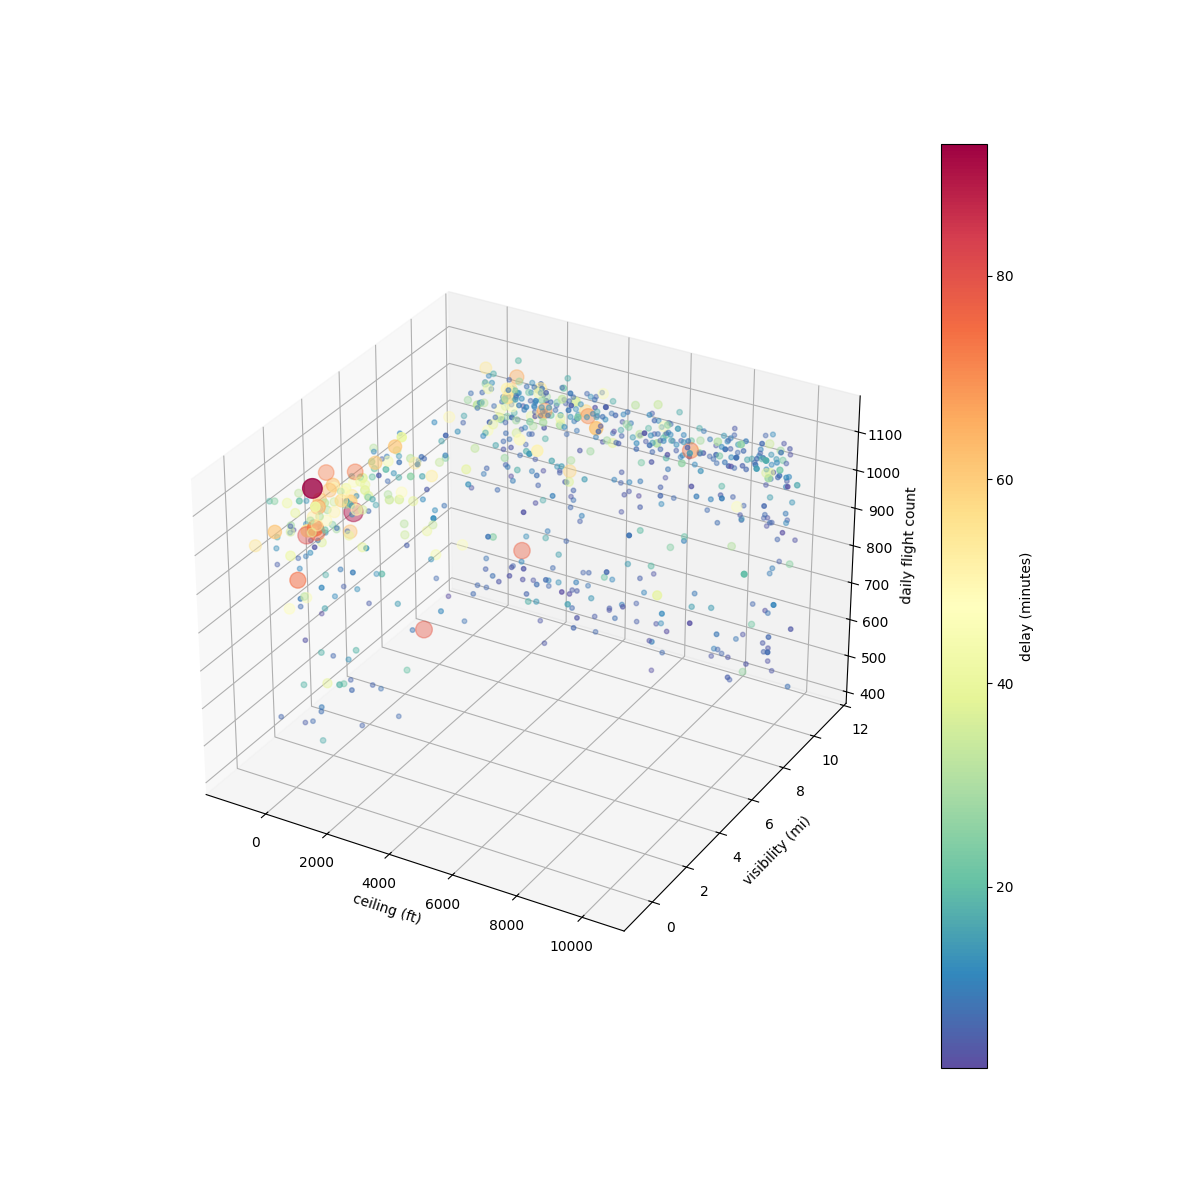

In [ ]:
idx = flight_counts.index
fig = scatter_test_3d(
    processed_ceiling[idx], 
    processed_visibility[idx], 
    flight_counts, 
    'daily flight count', 
    processed_delay[idx], 
    k=.04
)

In [ ]:
for series, name in (
    (processed_visibility, f'{airport}_w_processed_visibility'),
    (processed_ceiling, f'{airport}_w_processed_ceiling'),
    (flight_counts, f'{airport}_x_flight_counts'),
    (capacity_counts, f'{airport}_x_capacity_counts'),
    (d, f'{airport}_y_departure_delays'),
    (a, f'{airport}_y_arrival_delays'),
    (processed_delay, f'{airport}_y_event_delays')
):
    series.to_csv(f'{name}.csv')
    series.to_frame(f'{name}').to_parquet(f'{name}.parquet')

